# Cellbender test: Altena and Siletti

# Cellbender testing - Preprocessing

<div class="alert alert-warning">

**What these notebooks do**
    
The following collection of notebooks compares data before and after technical artifacts removal with Cellbender. Data of the snRNA human atlas of Siletti et.al (samples 10X176-1 and 10X176-2) and van Regteren Altena et. al. (sample g004). Both are aligned to the Ensemble 109 reference genome with Cell Ranger v6.1 including intronic mapping. 

The collection of notebooks contains four main sections: 1) Preprocessing, 2) Filtering, 3) Normalization, 4) Merging
    
<br>   
    
**What the first section (Preprocessing) does**
    
This section takes the aligned h5 files and shapes the data with annotations and quality control metrics. This additional information will be used to filter the data and prepare it for subsequent processing. For each h5 file a <sample_name>_preprocessed.h5ad file will be made which contain all necessary annotation for subsequent filtering. The section contains the following important subsections:

* Doublet detection <br>
* Adding quality metrics and mitochondrial gene removal<br>
  
    
<br>   
    
**What the second section (Filtering) does**

This section visualizes various quality control metric values and filters the data based on a threshold made on the observations/domain knowledge. The section contains the following important subsections:

* Doublet filtering <br>
* UMIs and gene counts filtering <br>
    
<br> 
    
**What the third section (Normalization) does**
    
This section normalizes the data based on sequencing depth and gene length so the cells are comparable. Subsequently dimensional reduction and clustering are performed to visualize samples separately. The section contains the following important subsections:

* Normalization <br>
* Dimensional reduction <br>
* Marker genes and property annotation visualizations <br>
    
<br>



### Loading libraries
Using sc2_seurat environment, importing packages and setting parameters.

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import matplotlib.pyplot as plt

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

### h5 files

In [19]:
#Kimberly Siletti
siletti='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/siletti_2022/cellranger/outs/filtered_feature_bc_matrix.h5'
siletti_CB='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/siletti_2022/cellranger/outs/cellbender_filtered.h5'

#Anna van Regteren Altena
altena='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/van_regteren_altena_2023/cellranger/standard_109/UMC-AR-g004/outs/filtered_feature_bc_matrix.h5'
altena_CB='/home/hers_basak/jjiang/jack/outputs/count_files/homo_sap/van_regteren_altena_2023/cellranger/standard_109/UMC-AR-g004/outs/UMC-AR-g004_cellbender_filtered.h5'



In [20]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/0_cellbender')

In [21]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_cellbender'

## Load data
The Gene Velocyto mode of Starsolo generates three mtx files: spliced.mtx, unspliced.mtx and ambiguous.mtx. These can be summed together to get the full count. The function "load Velocyto" does this for multiple folders and loads it into an anndata object. This function can take some time.. 
!cant use as function because variables will become local then

In [22]:
files = [siletti,siletti_CB,altena,altena_CB]
names = ['siletti','siletti_CB','altena','altena_CB'] #used for making variable names

numberobj = len(names)

object_names = list()

#locals() returns dictionary with all local variables and symbols
for i in range(numberobj):
    locals()["adata"+"_"+names[i]] = sc.read_10x_h5(files[i])
    locals()["adata"+"_"+names[i]].var_names_make_unique()
    print("adata"+"_"+names[i],"is loaded")
    
    object_names.append("adata"+"_"+names[i]) # make list of objects for later

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_siletti is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_siletti_CB is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


adata_altena is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


adata_altena_CB is loaded


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


## Basic Preprocessing
### Doublet detection using scrublet
Doublets are droplets that captures two cells, which will lead to inconsistencies. So we need to detect and remove them. First we will annotate the objects with metadata.

https://github.com/swolock/scrublet
https://www.sciencedirect.com/science/article/pii/S2405471218304745

Following the advice of Chromium (below), for 8000 cells recovered 6.10%; for 6800 5.24%.
> https://uofuhealth.utah.edu/huntsman/shared-resources/gba/htg/single-cell/genomics-10x.php


In [23]:
names

['siletti', 'siletti_CB', 'altena', 'altena_CB']

In [24]:
numberobj

4

In [25]:
#manually adding metadata due to lack of metadata file
for i in range(numberobj):
    locals()[object_names[i]].obs['species'] = ['Homo sapien','Homo sapien','Homo sapien','Homo sapien'][i]
    #locals()[object_names[i]].obs['gender'] = [,'male','male'][i]
    #locals()[object_names[i]].obs['age'] = ['6 months','6 months'][i]
    locals()[object_names[i]].obs['atlas'] = ['siletti','siletti','altena','altena'][i]
    
#viewing object annotations
for i in range(numberobj):
    print(locals()[object_names[i]].shape)
    

thr = 0.20
expected_doublet_rates = [0.0610,0.0610,0.0524,0.0524]
for i in range(numberobj):
    #predicts doublets and adds a score to objects
    sc.external.pp.scrublet(locals()[object_names[i]], expected_doublet_rate=expected_doublet_rates[i], stdev_doublet_rate=0.02, 
                            synthetic_doublet_umi_subsampling=1.0, knn_dist_metric='euclidean', normalize_variance=True, 
                            log_transform=False, mean_center=True, n_prin_comps=30, use_approx_neighbors=True, 
                            get_doublet_neighbor_parents=False, n_neighbors=None, threshold=thr, verbose=True, copy=False, random_state=0)
    #plot histogram of doublet scores(doesnt work in loop)
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),
                                               show=True,return_fig=True)


(8217, 60656)
(8190, 60656)
(6824, 60656)
(6751, 60656)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 39.9%
Overall doublet rate:
	Expected   = 6.1%
	Estimated  = 8.4%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Detected doublet rate = 3.1%
Estimated detectable doublet fraction = 38.7%
Overall doublet rate:
	Expected   = 6.1%
	Estimated  = 8.1%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Detected doublet rate = 5.0%
Estimated detectable doublet fraction = 51.3%
Overall doublet rate:
	Expected   = 5.2%
	Estimated  = 9.8%


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Detected doublet rate = 4.3%
Estimated detectable doublet fraction = 51.8%
Overall doublet rate:
	Expected   = 5.2%
	Estimated  = 8.3%


Check how many cells are higher than the threshold

In [26]:
for i in range(numberobj):
    print(names[i],'\n',locals()[object_names[i]].obs['predicted_doublet'].value_counts(),'\n')

siletti 
 False    7943
True      274
Name: predicted_doublet, dtype: int64 

siletti_CB 
 False    7931
True      257
Name: predicted_doublet, dtype: int64 

altena 
 False    6480
True      344
Name: predicted_doublet, dtype: int64 

altena_CB 
 False    6461
True      289
Name: predicted_doublet, dtype: int64 



### Scrublet simulation plot

siletti


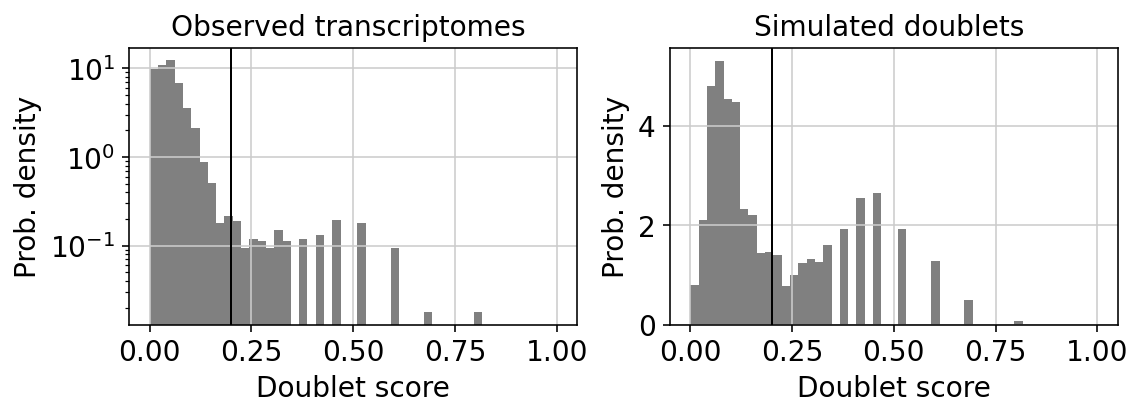

siletti_CB


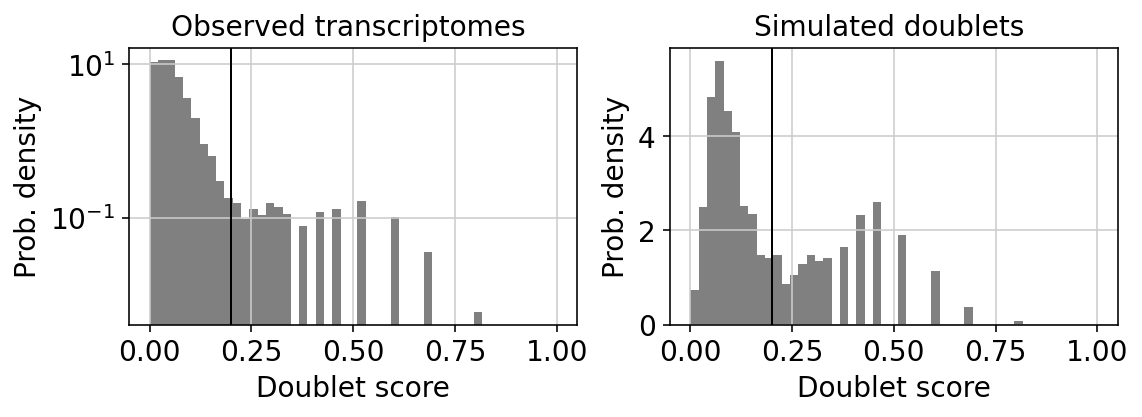

altena


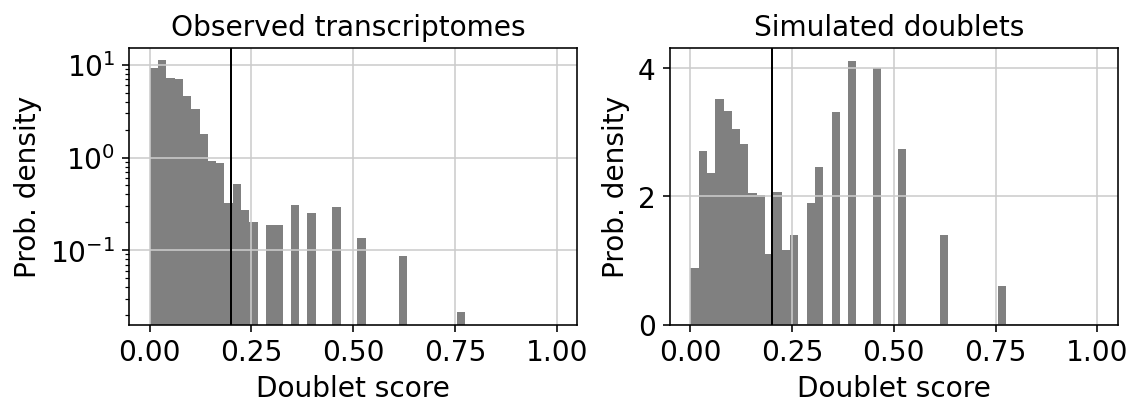

altena_CB


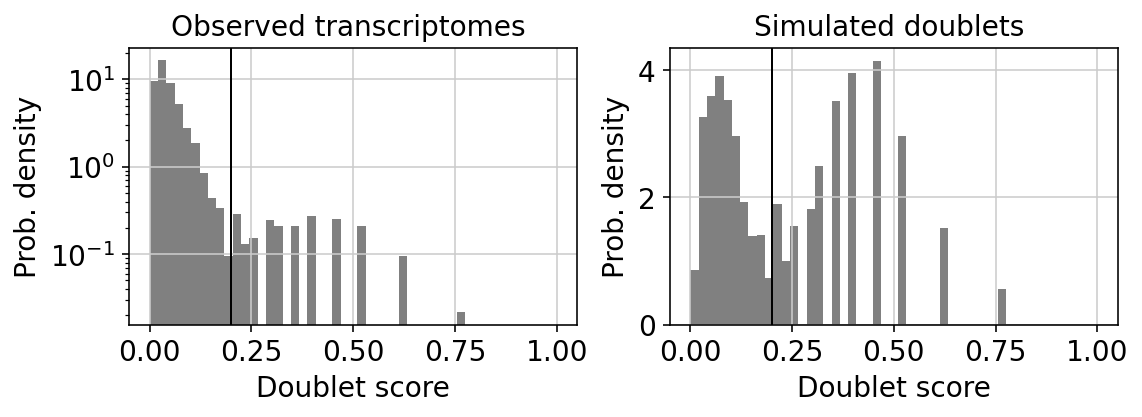

In [27]:
%matplotlib inline
for i in range(numberobj):
    print(names[i])
    sc.external.pl.scrublet_score_distribution(locals()[object_names[i]], scale_hist_obs='log', scale_hist_sim='linear', figsize=(8, 3),show=True,return_fig=True)

### Add QC and get rid of mitochondrial genes

In [31]:
adata_siletti_CB


AnnData object with n_obs × n_vars = 8190 × 60656
    obs: 'species', 'atlas', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'scrublet'

<b> check this: sc.pp.calculate_qc_metrics() </b> <br>
expr_type: kind of values in X (str)<br>
var_type: kind of variables (str)<br>
qc_vars: keys for variables you want to control (collection of str)<br>
percent_top: proportions of top genes to cover, for cummulative proportion of counts (collection of int)<br>
layer: alternative layers for expression data (str)<br>
use_raw: use adata.raw.X for expression values (bool)<br>
inplace: place metrics in adata (bool)<br>
log1p: compute log1p transformed annotations, for very small values (bool)<br>
<br>
<b> return features obs </b> <br>
n_genes_by_counts: The number of genes with at least 1 count in a cell. <br>
total_counts: Total number of counts for a cell. <br>
total_counts_mt:Total number of mt gene counts for a cell. <br>
pct_counts_mt: Proportion (%) of total counts for a cell which are mitochondrial. <br> 
n_genes: Number of genes with a positive count. <br>
total_counts_ribo: Total number of ribosomal counts for a cell. <br>
pct_counts_ribo: Proportion of total counts for a cell which are ribosomal.

In [32]:
import numpy as np

for i in range(numberobj):
    #add mt variable annotation indicating if a gene is ribosomal or not (bool)
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('MT-')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['mt'] = locals()[object_names[i]].var_names.str.startswith('mt-') 
        
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('RP')
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        locals()[object_names[i]].var['ribo'] = locals()[object_names[i]].var_names.str.startswith('Rp')
    
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=('mt','ribo'), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)
     
    locals()[object_names[i]].var_names_make_unique()
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1) #remove all cells with 0 genes
                 
    # The following is to solve a save issue. Probably because of the NA valies in ther 'predicted_doublet' slot
    locals()[object_names[i]].obs['predicted_doublet'] =  locals()[object_names[i]].obs['predicted_doublet'].astype('str')

    

Checking median number of mitochondrial genes, genes and UMIs per cell to have an idea of the quality of each run:

In [33]:
print("Median numbers before filtering mt genes")
for i in range(numberobj):
    print(
         object_names[i],'\n',"\tmito%:",np.median(locals()[object_names[i]].obs['pct_counts_mt']),'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']),'\n', 
            "\tmedian reads/nuclei:",np.median(locals()[object_names[i]].obs['total_counts']),'\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:",  int(np.mean(locals()[object_names[i]].obs['total_counts'])), '\n')
    

Median numbers before filtering mt genes
adata_siletti 
 	mito%: 0.29912326 
 	median genes/nuclei: 2788.0 
 	median reads/nuclei: 6222.0 
 	mean genes/nuclei: 3650 
 	mean reads/nuclei: 11779 

adata_siletti_CB 
 	mito%: 0.1568362919768964 
 	median genes/nuclei: 2767.5 
 	median reads/nuclei: 6199.5 
 	mean genes/nuclei: 3632 
 	mean reads/nuclei: 11760 

adata_altena 
 	mito%: 0.08833926 
 	median genes/nuclei: 3673.5 
 	median reads/nuclei: 11081.0 
 	mean genes/nuclei: 3737 
 	mean reads/nuclei: 12409 

adata_altena_CB 
 	mito%: 0.06575077029108203 
 	median genes/nuclei: 3640.0 
 	median reads/nuclei: 11064.0 
 	mean genes/nuclei: 3727 
 	mean reads/nuclei: 12432 



Filtering out mito genes to determine number of non mitochondrial genes:

In [36]:
for i in range(numberobj):
    #list all non mitochondrial genes for subsetting the columns
    if locals()[object_names[i]].obs['species'][0] == 'Homo sapien':
         non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('MT-')]
    elif locals()[object_names[i]].obs['species'][0] == 'Mus musculus':
        non_mito_genes_list = [name for name in locals()[object_names[i]].var_names if not name.startswith('mt-')]
    
    
    locals()[object_names[i]] = locals()[object_names[i]][:, non_mito_genes_list].copy()
    
    locals()[object_names[i]].obs['total_counts_mito'] =  locals()[object_names[i]].obs['total_counts']
    
    
    #recalculate the number of genes, because some cells only had mt gene counts
    sc.pp.filter_cells(locals()[object_names[i]], min_genes=1)

### Recalculate metrics 
Note that the qc_vars=None because we want to keep the mt%."


In [38]:
for i in range(numberobj):
    sc.pp.calculate_qc_metrics(locals()[object_names[i]], expr_type='counts', var_type='genes', qc_vars=(), percent_top= (), layer= None, use_raw= False, inplace=True, log1p=True)


Check for the basic statistics

In [39]:
sc.set_figure_params(figsize=[8,8])

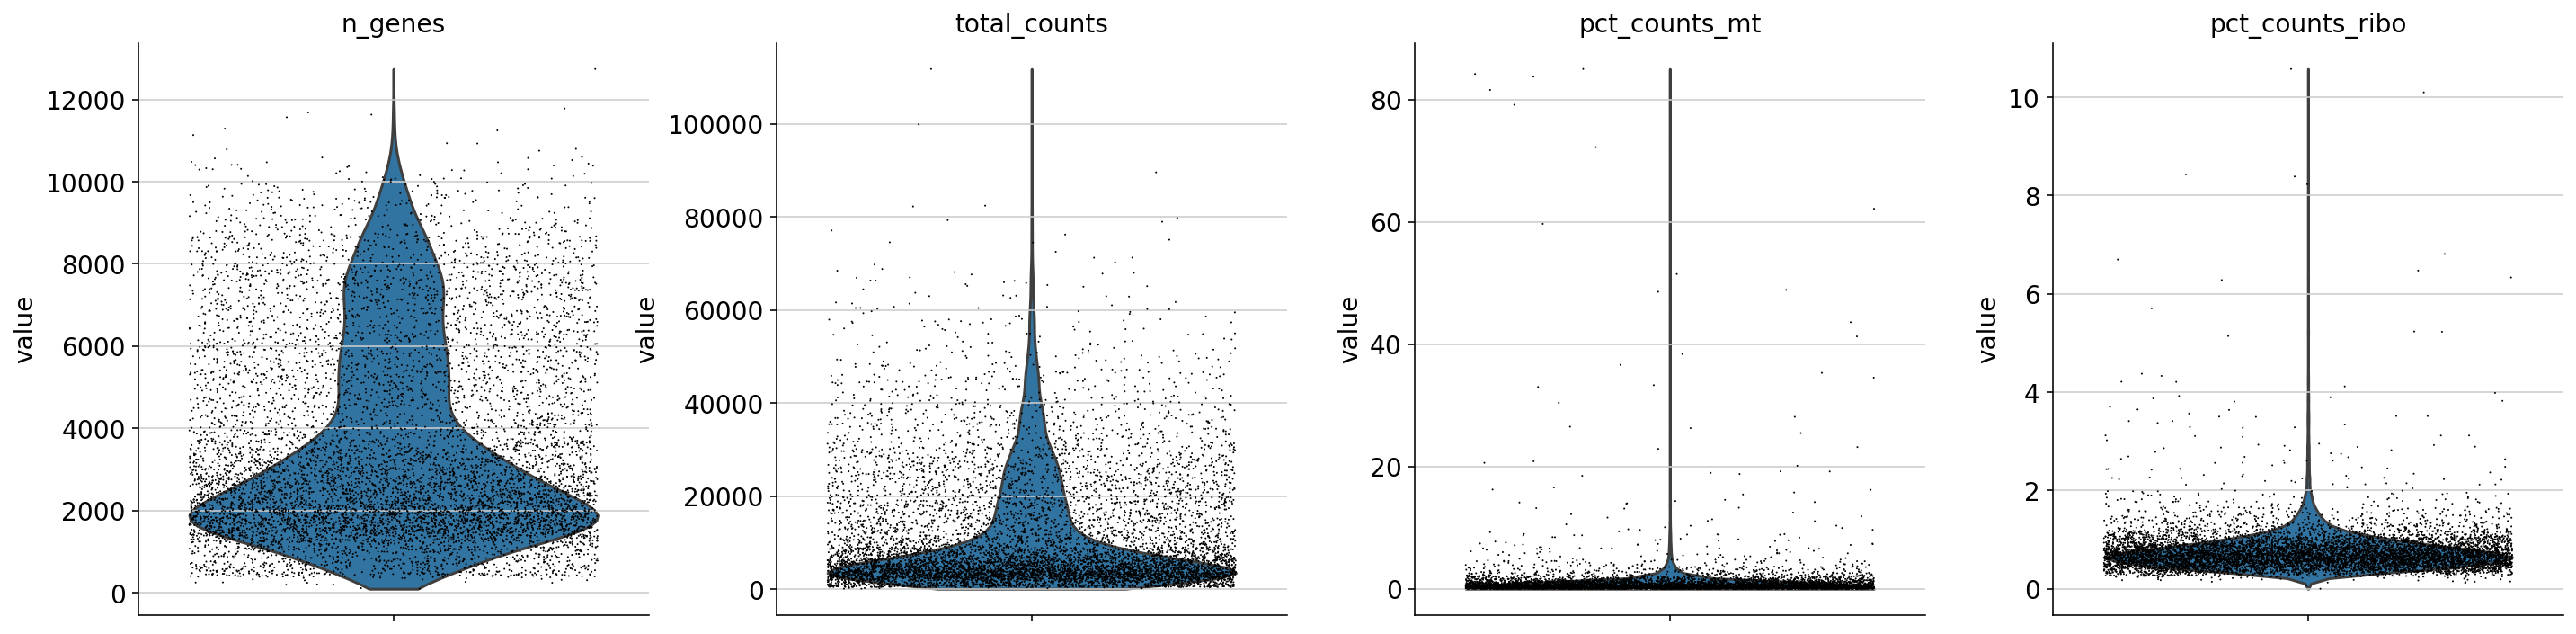

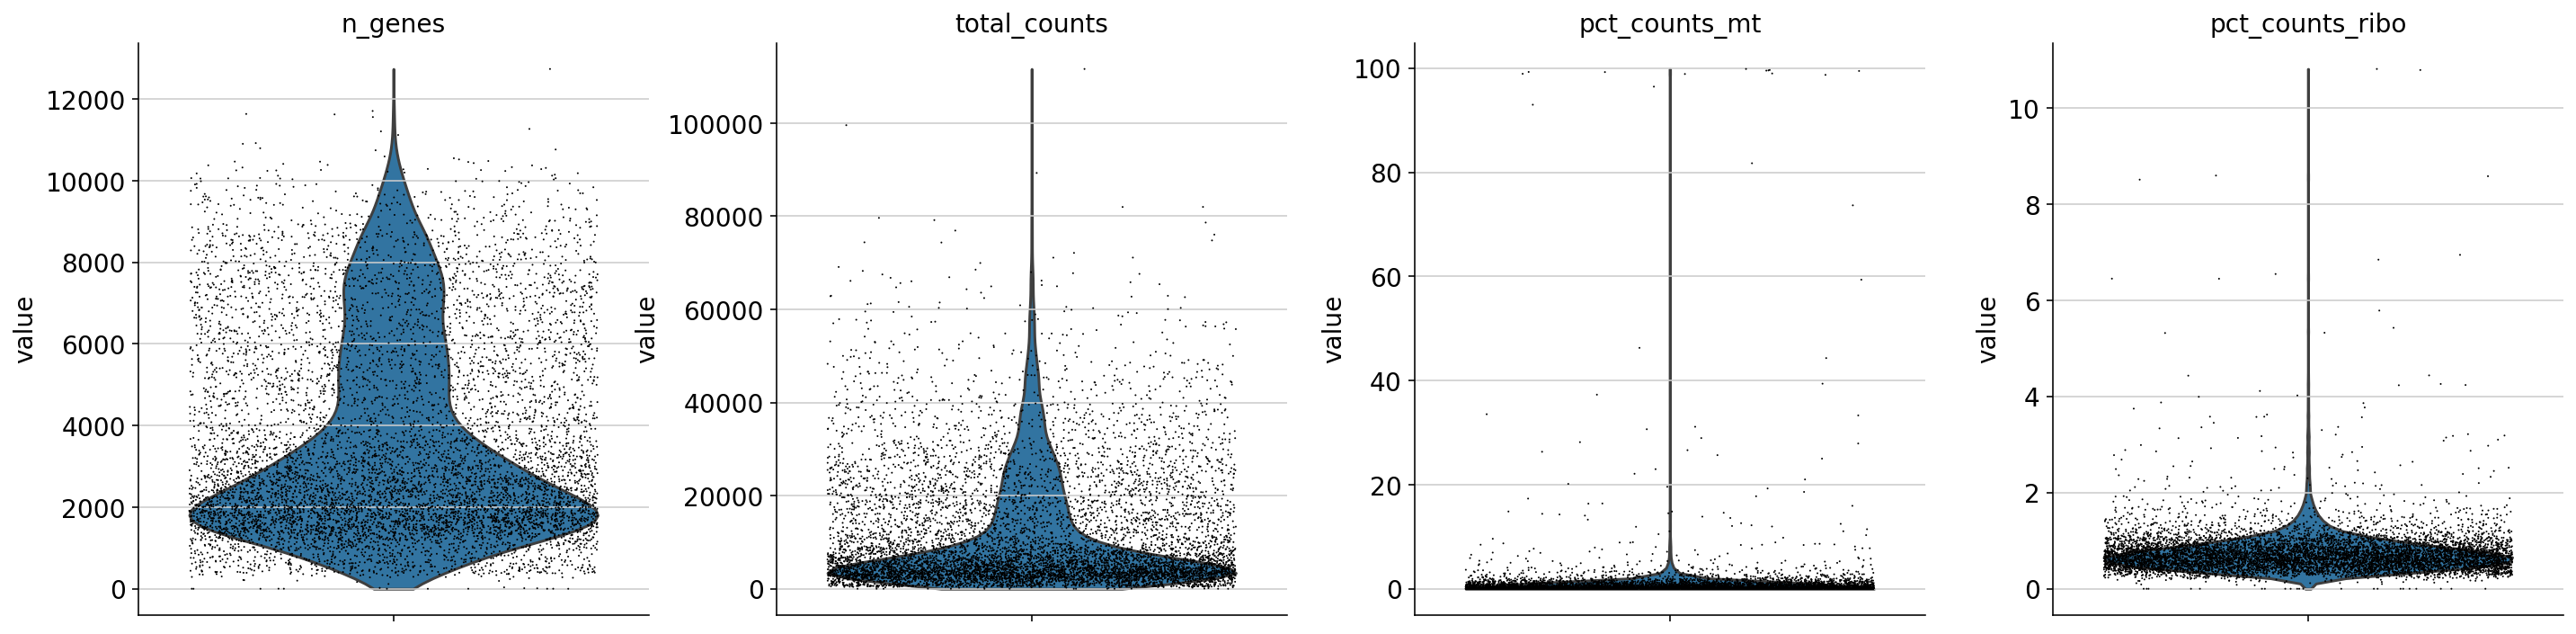

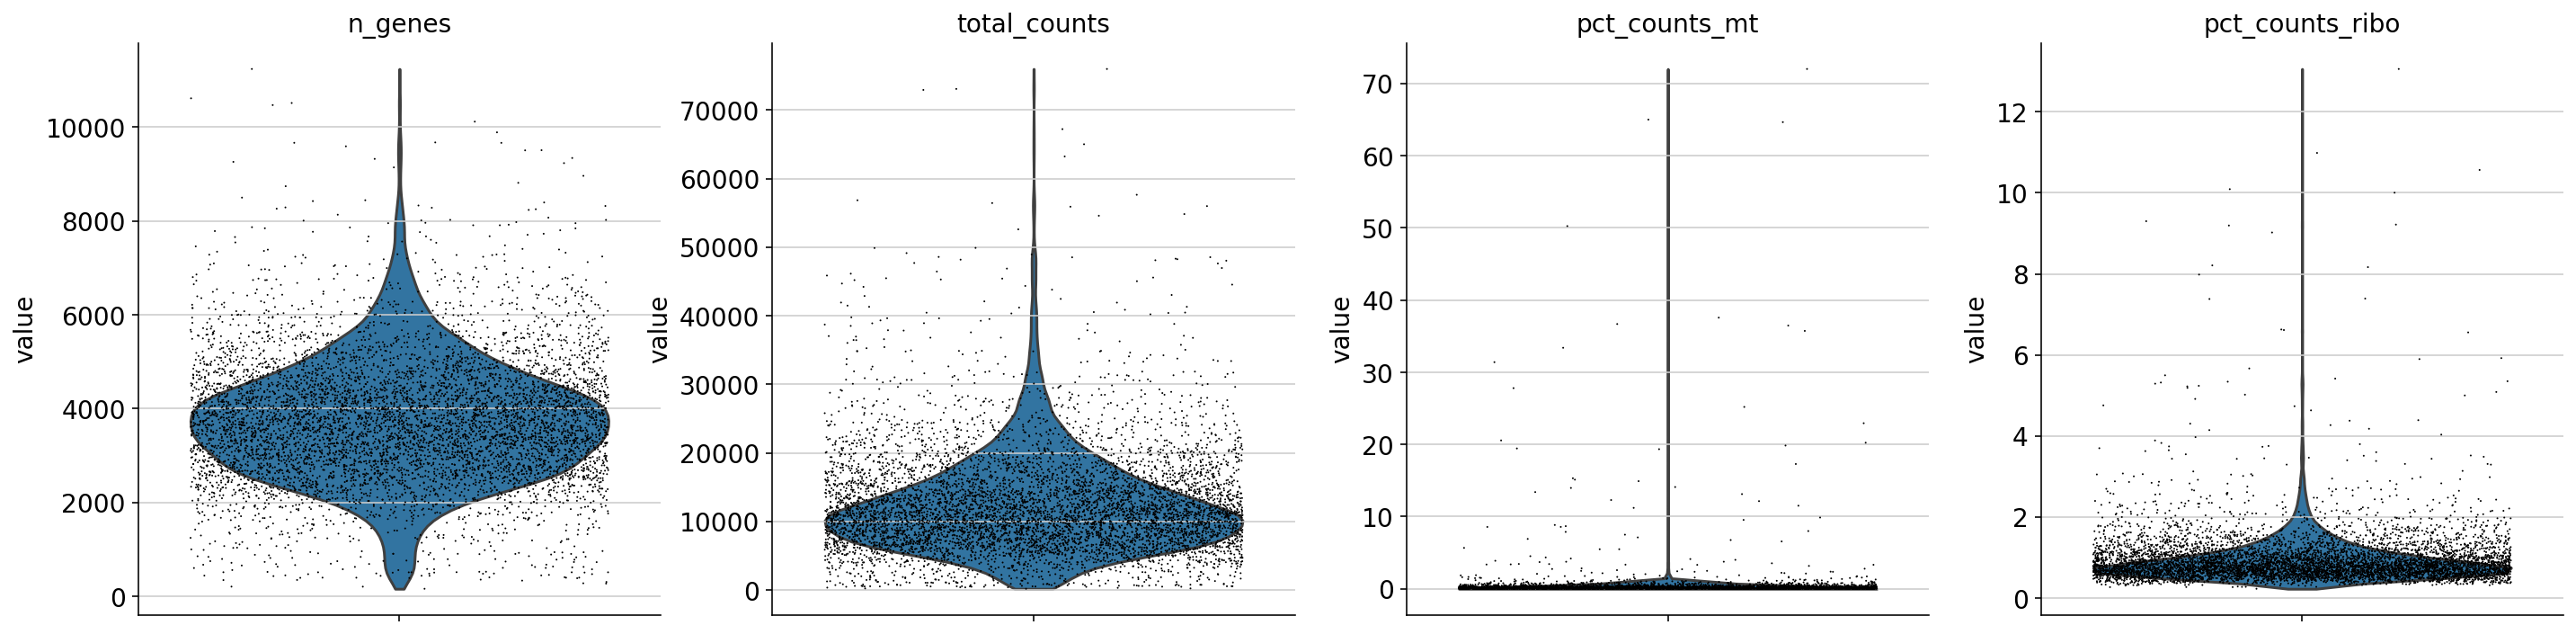

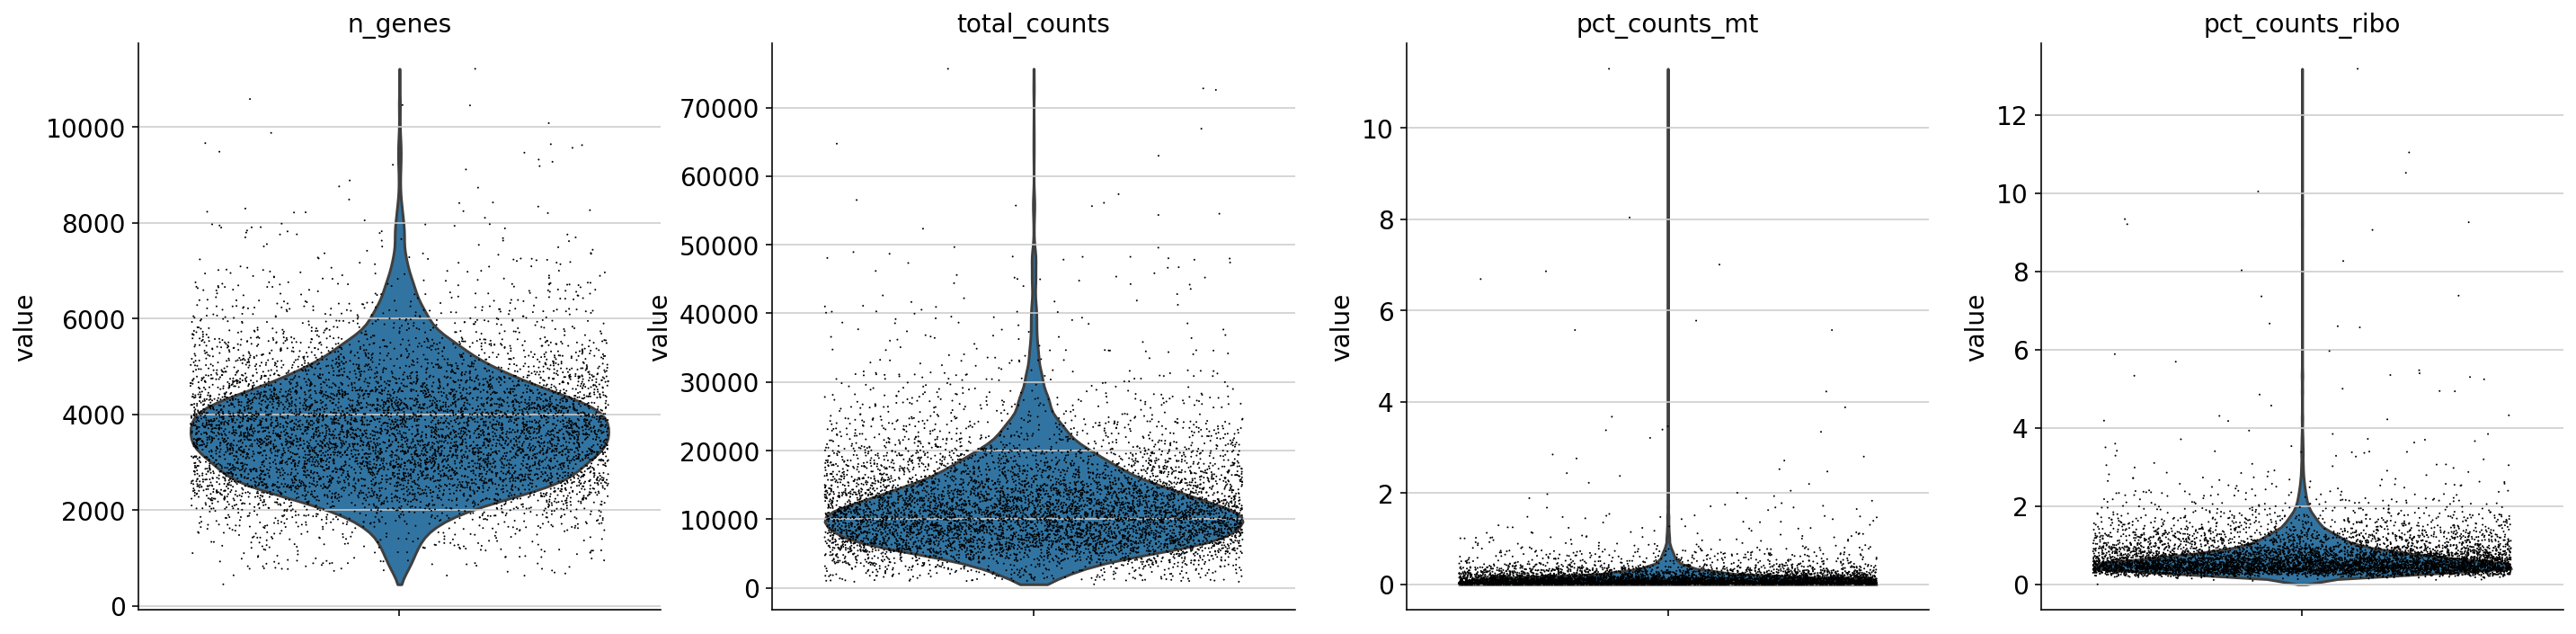

In [40]:
%matplotlib inline
for i in range(numberobj):
    sc.pl.violin(locals()[object_names[i]], ['n_genes', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, multi_panel=True,size =1)#,save= object_names[i]+"_prefilter_all.pdf")
    plt.show()

In [41]:
print("Median numbers without mitochondrial reads\n")


for i in range(numberobj):
    median_counts = np.median(locals()[object_names[i]].obs['total_counts_mito'])
    mean_counts= int(np.mean(locals()[object_names[i]].obs['total_counts_mito']))

    median_counts_mito = np.median(locals()[object_names[i]].obs['total_counts']) 
    mean_counts_mito =int(np.mean(locals()[object_names[i]].obs['total_counts']))

    median_difference = median_counts - median_counts_mito 
    mean_difference = mean_counts -  mean_counts_mito
    
    pct_median_diff = median_difference / median_counts
    pct_mean_diff = mean_difference/mean_counts
    
    print(object_names[i],'\n',"\tmedian genes/nuclei:",np.median(locals()[object_names[i]].obs['n_genes']), '\n',
            "\tmedian reads/nuclei:",median_counts, '(',median_difference,'\t', pct_median_diff,'%',')','\n',
           "\tmean genes/nuclei:",int(np.mean(locals()[object_names[i]].obs['n_genes'])),'\n',
         "\tmean reads/nuclei:", mean_counts, '(',mean_difference,'\t', pct_mean_diff,'%',')','\n')

Median numbers without mitochondrial reads

adata_siletti 
 	median genes/nuclei: 2781.0 
 	median reads/nuclei: 6222.0 ( 26.0 	 0.0041787205 % ) 
 	mean genes/nuclei: 3642 
 	mean reads/nuclei: 11779 ( 84 	 0.007131335427455641 % ) 

adata_siletti_CB 
 	median genes/nuclei: 2763.0 
 	median reads/nuclei: 6201.0 ( 17.5 	 0.0028221254636348974 % ) 
 	mean genes/nuclei: 3627 
 	mean reads/nuclei: 11763 ( 77 	 0.006545949162628581 % ) 

adata_altena 
 	median genes/nuclei: 3667.5 
 	median reads/nuclei: 11081.0 ( 8.0 	 0.0007219565 % ) 
 	mean genes/nuclei: 3730 
 	mean reads/nuclei: 12409 ( 18 	 0.0014505600773632042 % ) 

adata_altena_CB 
 	median genes/nuclei: 3636.0 
 	median reads/nuclei: 11064.0 ( 14.5 	 0.0013105567606652205 % ) 
 	mean genes/nuclei: 3722 
 	mean reads/nuclei: 12432 ( 14 	 0.0011261261261261261 % ) 



### Save preprocessed files

In [43]:
for i in range(numberobj):
    locals()[object_names[i]].write(os.path.join('data/'+object_names[i][6:]+'_preprocessed.h5ad'))

In [44]:
!ls data/

altena_CB_preprocessed.h5ad  siletti_CB_preprocessed.h5ad
altena_preprocessed.h5ad     siletti_preprocessed.h5ad
